In [23]:
# importing basic libraires
import pandas as pd
import numpy as np

# importing data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as pe
#importing warnings for warning filtration
import warnings
warnings.filterwarnings('ignore')

#setting up figure parameters
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

%matplotlib inline

# library for logistic model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

# scaling and splitting data libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import seaborn as sns
sns.set_theme(style='darkgrid', palette='Set1')

In [3]:
df = pd.read_csv('../DATA/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

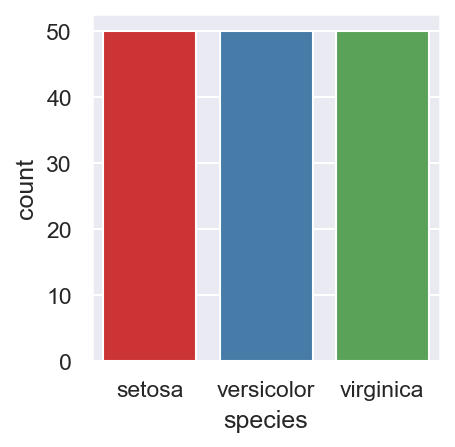

In [8]:
sns.countplot(data = df, x = 'species')

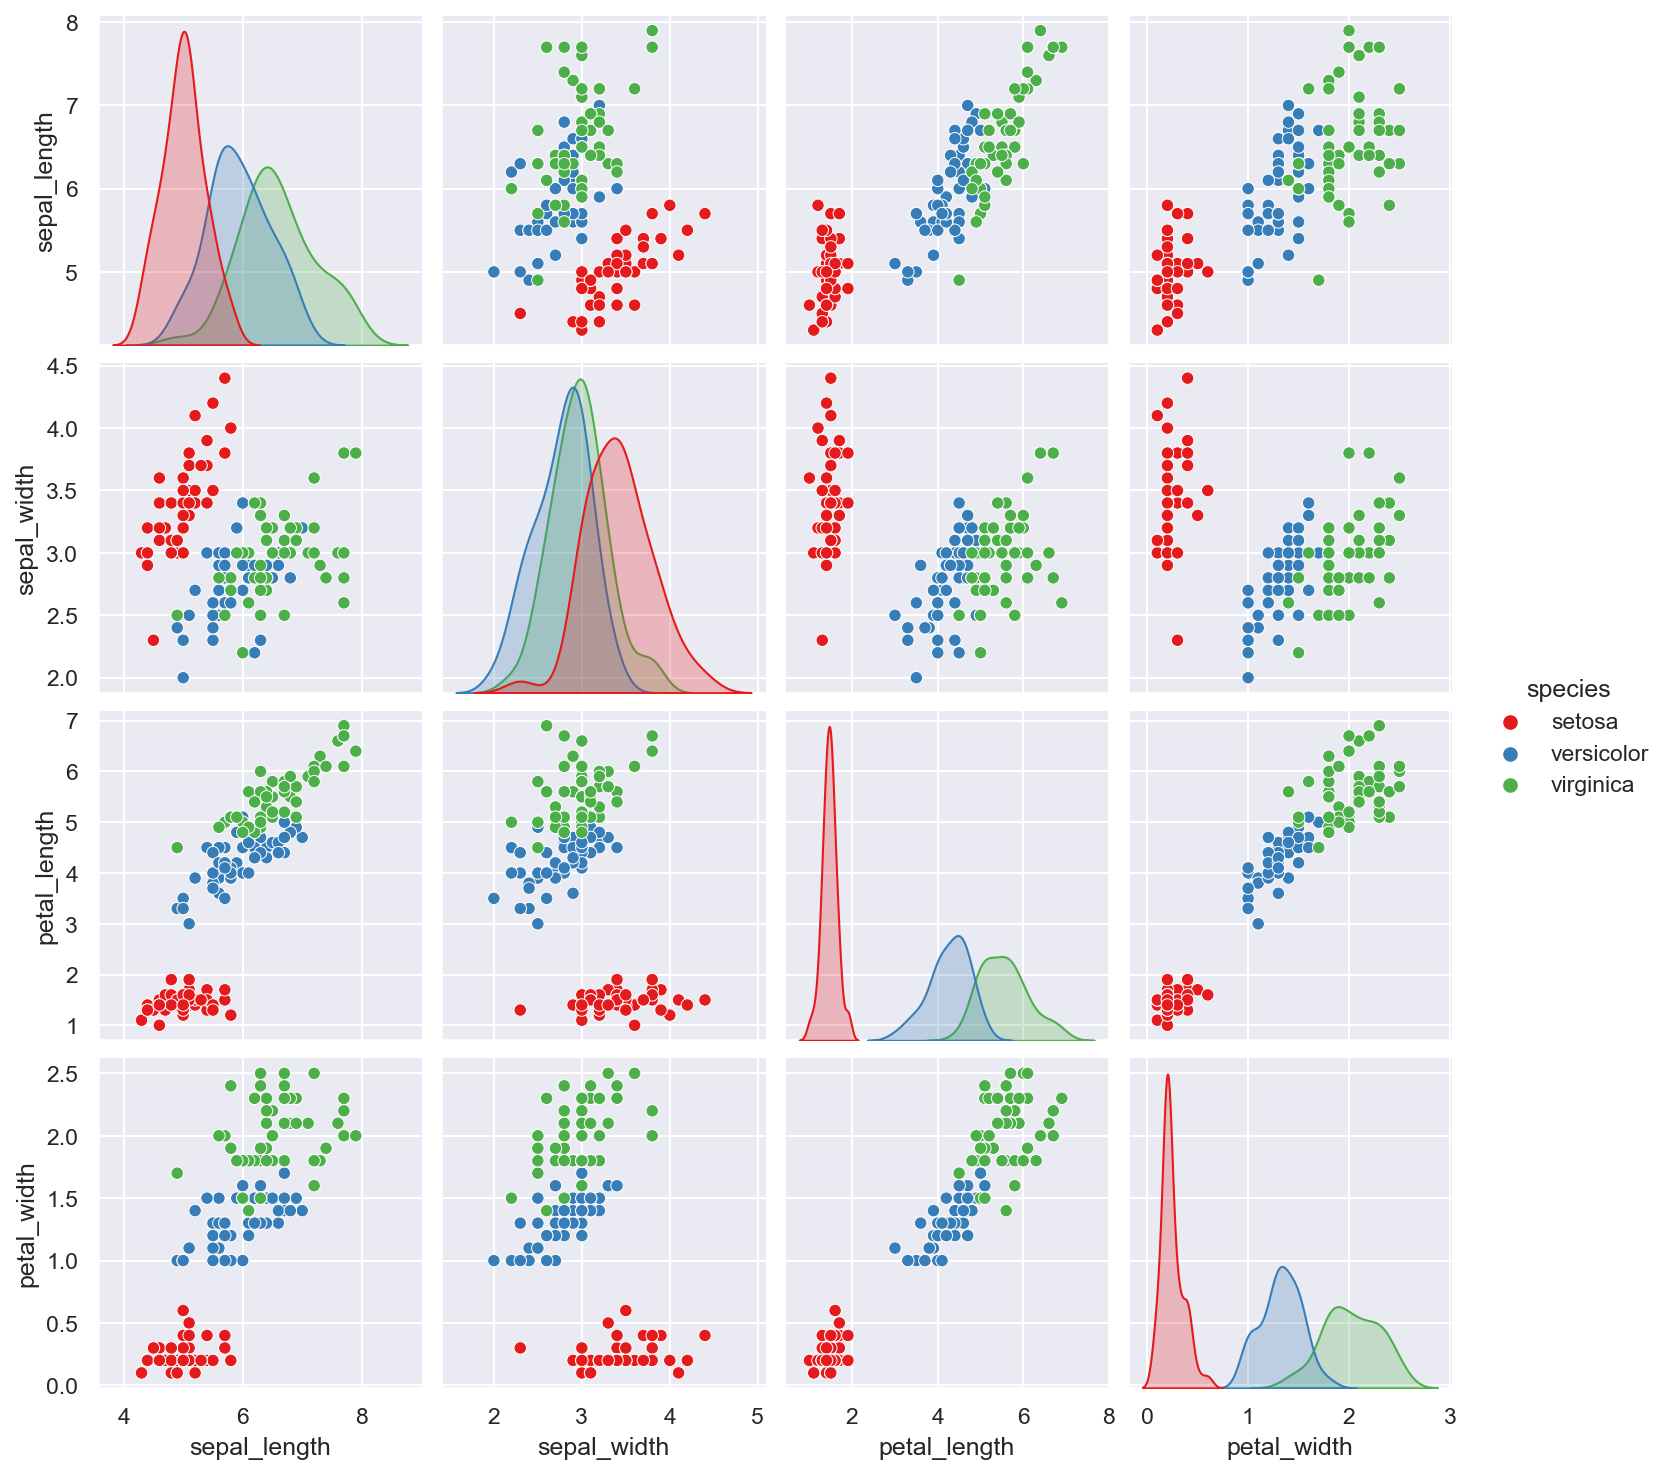

In [9]:
sns.pairplot(data = df, hue = 'species')

<Axes: >

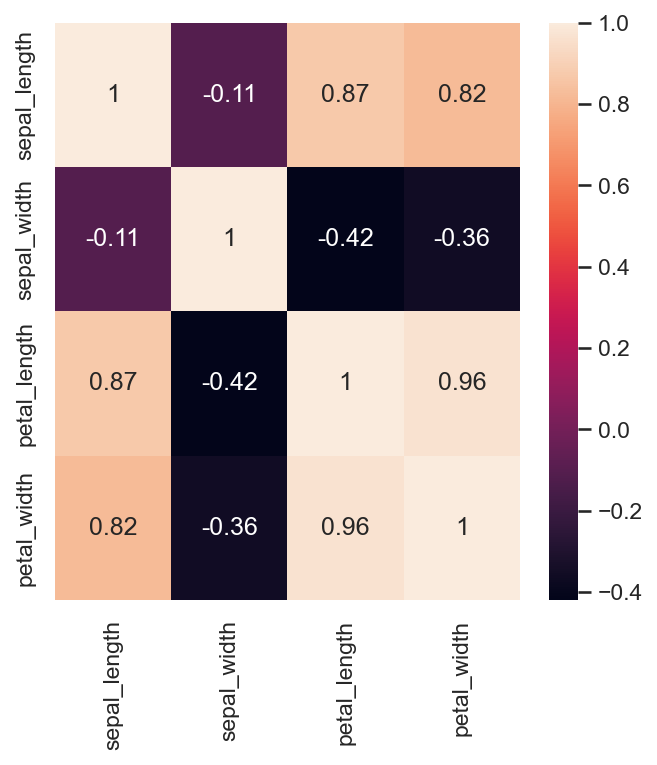

In [19]:
sns.heatmap(df.corr(),annot=True)

In [14]:
x = df.drop('species',axis = 1)
y = df['species']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
model = LogisticRegressionCV(Cs=C,penalty='elasticnet',l1_ratios=[.1,.25,.50,.75,.99], solver='saga',multi_class="ovr",max_iter=5000)

In [43]:
model.fit(x_train,y_train)

LogisticRegressionCV(Cs=array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                     l1_ratios=[0.1, 0.25, 0.5, 0.75, 0.99], max_iter=5000,
                     multi_class='ovr', penalty='elasticnet', solver='saga')

In [44]:
y_pred = model.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      0.90      0.95        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      1.00      1.00        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [52]:
log_model = LogisticRegression(multi_class="ovr",max_iter=5000)
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [53]:
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [54]:
grid_model.best_params_

{'C': 21.544346900318832, 'penalty': 'l2'}

In [55]:
y_pred_grid = grid_model.predict(x_test)

In [56]:
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

